<a href="https://colab.research.google.com/github/PhellipeLisboa/Data_science/blob/main/Analise_dos_Dados_do_Airbnb_para_T%C3%B3quio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - *Tóquio*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Tóquio, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Os dados utilizados para realizar a análise exploratória foram retirados do seguinte arquivo do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html):

* `listings.csv` - *Summary information and metrics for listings in Tokyo (good for visualisations).*


In [ ]:
# Importando os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

%matplotlib inline

In [ ]:
# Importando o arquivo listings.csv para um DataFrame
df = pd.read_csv("https://data.insideairbnb.com/japan/kant%C5%8D/tokyo/2024-06-29/visualisations/listings.csv")

## Análise dos Dados


**Dicionário das variáveis**

* `id` - Número de id gerado para identificar o imóvel.
* `name` - Nome da propriedade anunciada.
* `host_id` - Número de id gerado para identificar o proprietário do imóvel.
* `neighbourhood_group` - Esta coluna não possui nenhum valor válido.
* `neighbourhood` - Nome do bairro em que se encontra a propriedade.
* `latitude` - Coordenada da latitude da propriedade.
* `longitude` - Coordenada da longitude da propriedade.
* `room_type` - Tipo de quarto ofertado.
* `price` - Preço de aluguel.
* `minimum_nights` - Número mínimo de noites que o hóspede deve reservar.
* `number_of_reviews` - Quantidade de avaliações que a propriedade recebeu.
* `last_review` - Data em que a última avaliação foi feita.
* `reviews_per_month` - Quantidade de avaliações que a propriedade recebe por mês.
* `calculated_host_listings_count` - Número de imóveis que o proprietário possui.
* `availability_365` - Quantidade de dias no ano em que o imóvel ficou disponível para reservas.
* `number_of_reviews_ltm` - Número de avaliações que a propriedade possui nos últimos doze meses.
* `license` - Número de licença/autorização/registro.

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# Mostrando as 5 primeiras entradas do dataset
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,197677,Oshiage Holiday Apartment,964081,Yoshimi & Marek,NaN,Sumida Ku,35.717070,139.826080,Entire home/apt,12000.0,3,176,2024-05-15,1.13,1,223,4,M130003350
1,776070,Kero-kero house room 1,801494,Kei,NaN,Kita Ku,35.738440,139.769170,Private room,9652.0,3,256,2024-06-03,1.81,1,173,13,M130000243
2,905944,4F - Near Shinjuku & Shibuya,4847803,Best Stay In Tokyo!,NaN,Shibuya Ku,35.678780,139.678470,Entire home/apt,25738.0,3,219,2024-06-19,1.60,6,115,33,Hotels and Inns Business Act | 渋谷区保健所長 | 31渋健生...
3,1016831,5 mins Shibuya Cat modern sunny Shimokita,5596383,Wakana,NaN,Setagaya Ku,35.658000,139.671340,Private room,23286.0,10,268,2024-06-26,1.96,2,129,24,M130001107
4,1196177,Stay with host Cozy private room Senju area,5686404,Yukiko,NaN,Adachi Ku,35.744731,139.797384,Private room,7500.0,2,120,2024-06-15,0.91,1,36,26,M130007760


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

É possível saber a quantidade de entradas (linhas) e de variáveis (colunas) do dataset por meio da priopriedade `shape` do nosso DataFrame:

In [ ]:
# Identificando o volume de dados do DataFrame
print("Número de entradas:\t {}".format(df.shape[0]))
print("Número de variáveis:\t {}\n".format(df.shape[1]))

# Verificando os tipos das variáveis
display(df.dtypes)


Número de entradas:	 16518
Número de variáveis:	 18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

Podemos notar que a coluna `last_review` que é composta por datas é do tipo object, para trabalhar com esses dados o ideal seria convertê-los para um datetime object da biblioteca Pandas:

In [ ]:
# Convertendo a coluna last_review em datatime
df.last_review = pd.to_datetime(df.last_review, format="%Y-%m-%d")

#### Analisando colunas do DataFrame

##### **`id`**

Considero importante verificar se todas as entradas para essa variável são únicas:

In [ ]:
# Verificando a quantidade de entradas de id únicas
df.id.value_counts()

id
197677                 1
986551278601725483     1
985775038393562367     1
985789467860480714     1
985795431601128875     1
                      ..
46605445               1
46606069               1
46606336               1
46606714               1
1189054292409642178    1
Name: count, Length: 16518, dtype: int64

Como a variável `id` é realmente única, podemos utilizá-la para identificar cada linha de nosso dataset. Sendo assim, vamos definí-la como index:

In [ ]:
df = df.set_index("id")

##### **`host_id` e `calculated_host_listings_count`**

Essas duas variáveis representam respectivamente o id que representa o dono de uma propriedade e a quantidade de imóveis que um proprietário possui, portanto é plausível que um `host_id` específico apareça em um número de entradas do dataset equivalente ao valor de sua variável `calculated_host_listings_count`. Vamos pegar a terceira entrada do nosso dataset como exemplo:

In [ ]:
# Primeiras três entradas do dataset
df.head(3)

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
id,,,,,,,,,,,,,,,,,
197677,Oshiage Holiday Apartment,964081,Yoshimi & Marek,NaN,Sumida Ku,35.71707,139.82608,Entire home/apt,12000.0,3,176,2024-05-15,1.13,1,223,4,M130003350
776070,Kero-kero house room 1,801494,Kei,NaN,Kita Ku,35.73844,139.76917,Private room,9652.0,3,256,2024-06-03,1.81,1,173,13,M130000243
905944,4F - Near Shinjuku & Shibuya,4847803,Best Stay In Tokyo!,NaN,Shibuya Ku,35.67878,139.67847,Entire home/apt,25738.0,3,219,2024-06-19,1.60,6,115,33,Hotels and Inns Business Act | 渋谷区保健所長 | 31渋健生...


Essa entrada é referente a uma propriedade cujo id do proprietário é 4847803 e diz que o número de imóveis que ele possui é 6. Sendo assim, se o conjunto de dados estiver consistente, podemos inferir que o id 4847803 aparecerá em um total de 6 linhas.

Vamos verificar se a quantidade de combinações entre `host_id` e `calculated_host_listings_count` equivale ao valor da variável `calculated_host_listings_count`:

In [ ]:
# Verificando a quantidade de combinações entre host_id e calculated_host_listings_count
df[["host_id", "calculated_host_listings_count"]].value_counts()

host_id    calculated_host_listings_count
229627088  106                               106
110379659  99                                 99
151970670  86                                 86
42244167   78                                 78
228133407  76                                 76
                                            ... 
283923267  1                                   1
283659065  1                                   1
283508060  1                                   1
283060259  1                                   1
585981884  1                                   1
Name: count, Length: 3897, dtype: int64

Também é interessante verificar a porcentagem de anfitriões que estão anunciando mais que um imóvel porque tem uma probabilidade mais alta de eles estarem tratando o aluguel dessas propriedades como um negócio sério, logo existe menos chance de estarem morando nesses imóveis ou violando alguma lei.

In [ ]:
# Verificando a porcentagem de anfitriões que possuem mais que 1 imóvel anunciado
(df[["calculated_host_listings_count"]] > 1).sum() / df.shape[0]

calculated_host_listings_count    0.900654
dtype: float64

A grande maioria dos proprietários (90%) possuem mais que um imóvel para aluguel no Airbnb na cidade de Tóquio.

##### **`neighbourhood`**

É interessante saber quantas propriedades estão registradas em cada localidade:

In [ ]:
# Verificando quantas propriedades existem por localidade
df.neighbourhood.value_counts()

neighbourhood
Shinjuku Ku            3312
Sumida Ku              2069
Taito Ku               1964
Toshima Ku             1528
Shibuya Ku             1039
Ota Ku                  640
Minato Ku               617
Setagaya Ku             539
Nakano Ku               480
Kita Ku                 476
Katsushika Ku           460
Suginami Ku             381
Koto Ku                 333
Bunkyo Ku               329
Chuo Ku                 323
Edogawa Ku              314
Itabashi Ku             290
Arakawa Ku              266
Shinagawa Ku            232
Adachi Ku               208
Chiyoda Ku              183
Meguro Ku               115
Nerima Ku                86
Musashino Shi            40
Fuchu Shi                34
Hachioji Shi             28
Machida Shi              23
Ome Shi                  23
Hino Shi                 21
Kokubunji Shi            20
Chofu Shi                16
Mitaka Shi               16
Akiruno Shi              13
Komae Shi                12
Higashimurayama Shi      11
Kunita

In [ ]:
# Verificando a porcentagem de propriedades por localidade
df.neighbourhood.value_counts() / df.shape[0]

neighbourhood
Shinjuku Ku            0.200509
Sumida Ku              0.125257
Taito Ku               0.118901
Toshima Ku             0.092505
Shibuya Ku             0.062901
Ota Ku                 0.038746
Minato Ku              0.037353
Setagaya Ku            0.032631
Nakano Ku              0.029059
Kita Ku                0.028817
Katsushika Ku          0.027848
Suginami Ku            0.023066
Koto Ku                0.020160
Bunkyo Ku              0.019918
Chuo Ku                0.019554
Edogawa Ku             0.019010
Itabashi Ku            0.017557
Arakawa Ku             0.016104
Shinagawa Ku           0.014045
Adachi Ku              0.012592
Chiyoda Ku             0.011079
Meguro Ku              0.006962
Nerima Ku              0.005206
Musashino Shi          0.002422
Fuchu Shi              0.002058
Hachioji Shi           0.001695
Machida Shi            0.001392
Ome Shi                0.001392
Hino Shi               0.001271
Kokubunji Shi          0.001211
Chofu Shi              0.0

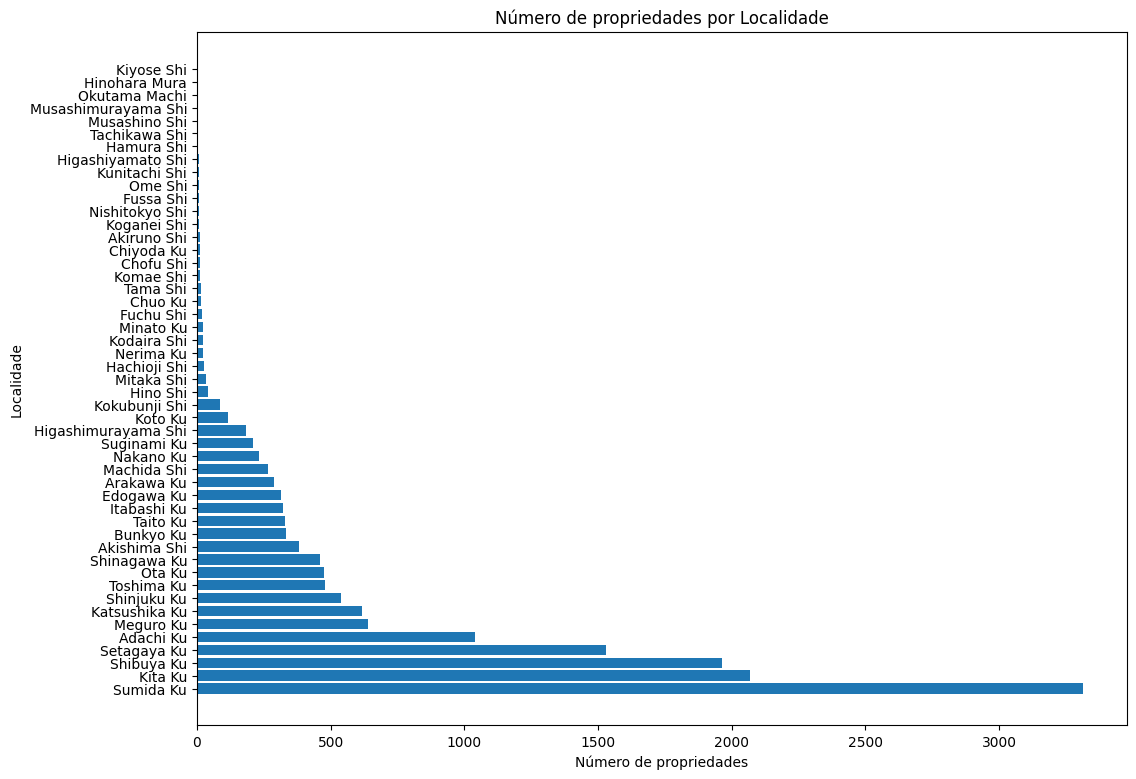

In [ ]:
# Plotando gráfico de número de propriedades x localidade
plt.figure(figsize=(12, 9))
plt.barh(df.neighbourhood.unique(), df.neighbourhood.value_counts());
plt.title("Número de propriedades por Localidade")
plt.xlabel("Número de propriedades")
plt.ylabel("Localidade")

# Mostrar o gráfico
plt.show()


### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

É importante saber se existem colunas que possuem valores ausentes ou NaN ao invés de dados úteis para nossa análise.

Uma boa forma de visualizar os valores ausentes é por meio da biblioteca missingno:

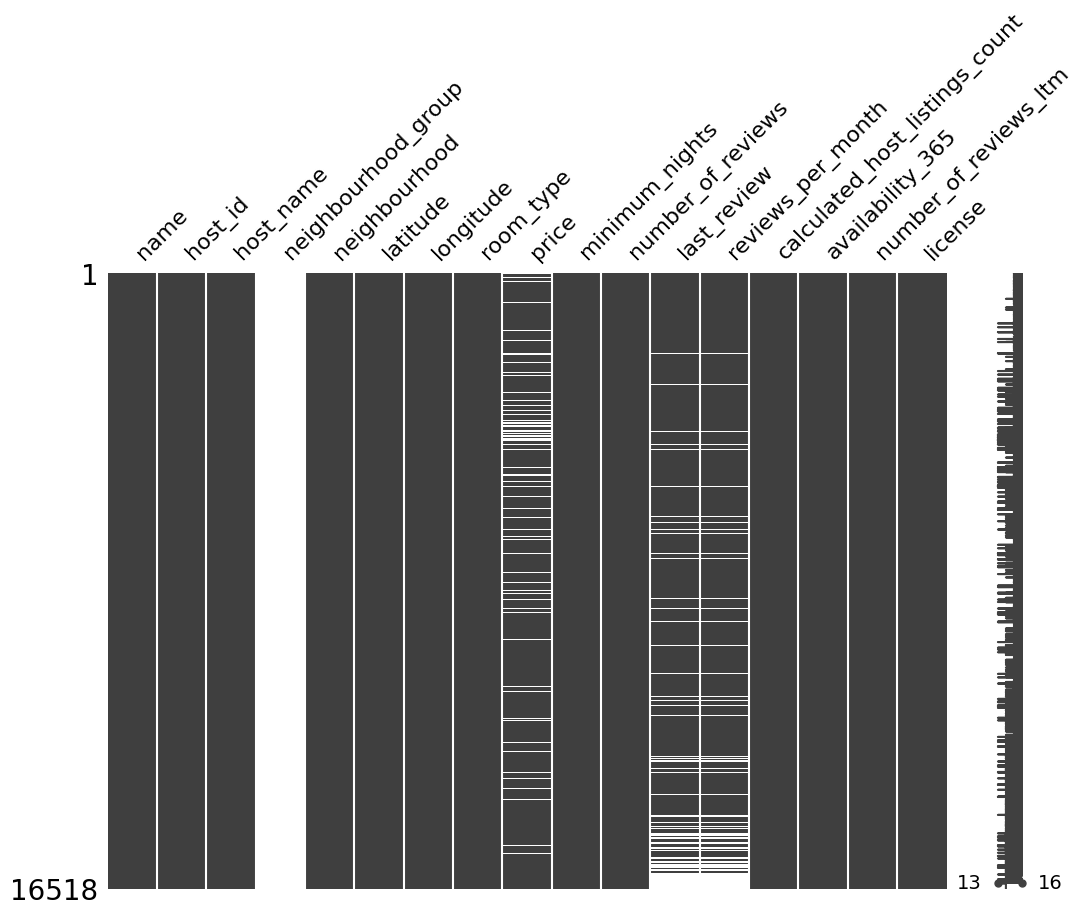

In [ ]:
# Plotando gráfico de valores ausentes
missingno.matrix(df, figsize=(12, 8));


Apenas com essa visualização gráfica já é possível perceber que:
* A coluna `neighbourhood_group` está completamente vazia.
* As colunas `price`, `last_review` e `reviews_per_month` possuem valores ausentes.
* As entradas com valores ausentes das colunas `last_review` e `reviews_per_month` parecem coincidir perfeitamente, o que poderia indicar algum padrão através de uma análise mais profunda.

Por mais que a visualização gráfica nos dê uma boa ideia inicial da situação, é interessante também obter a quantidade exata de valores ausentes e qual fração do nosso dataset eles representam para que possamos posteriormente tomar a melhor decisão de como lidar com a ausência desses valores, seja excluindo as entradas que possuem valores ausentes ou preenchendo as lacunas com algum valor que faça sentido.

In [ ]:
# Verificando as variáveis por seus valores ausentes e ordenando em ordem decrescente
df.isnull().sum().sort_values(ascending=False)

neighbourhood_group               16518
reviews_per_month                  1921
last_review                        1921
price                              1713
license                              10
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
name                                  0
minimum_nights                        0
number_of_reviews                     0
host_name                             0
host_id                               0
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
id                                    0
dtype: int64

In [ ]:
# Obtendo as porcentagens de valores ausentes nas variáveis
df.isnull().sum().sort_values(ascending=False) / df.shape[0]

neighbourhood_group               1.000000
reviews_per_month                 0.116297
last_review                       0.116297
price                             0.103705
license                           0.000605
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
name                              0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
host_name                         0.000000
host_id                           0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
number_of_reviews_ltm             0.000000
id                                0.000000
dtype: float64

Observando as porcentagens de valores ausentes em cada variável percebe-se que:

* As colunas `reviews_per_month`, `last_review` e `price` possuem aproximadamente 10% de seus valores ausentes.
* A colunas `license` também possui valores ausentes, mas representam apenas 0,06% das entradas.

### **Q3. Qual o tipo de distribuição das variáveis?**

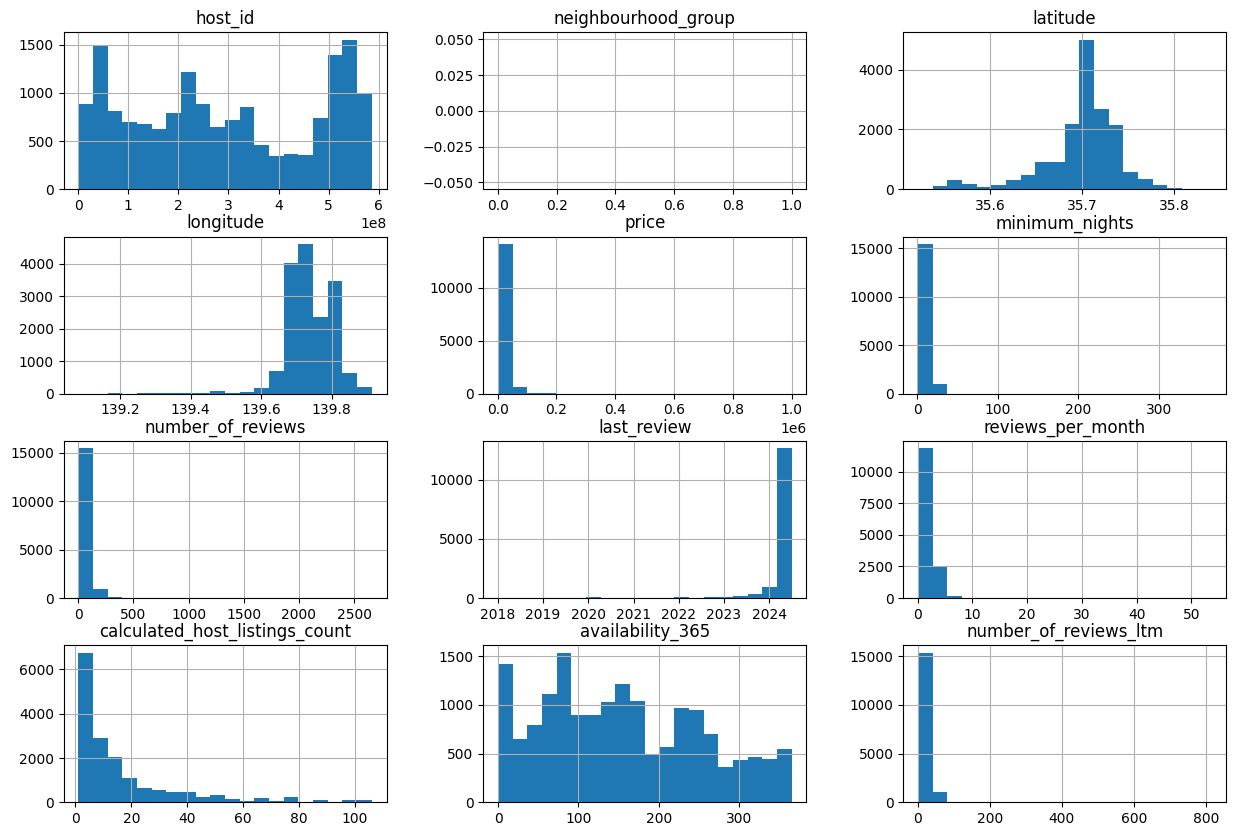

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=20, figsize=(15,10));

É importante verificar a presença de *outliers* em nosso dataset, para isso pode-se utilizar o método `describe()` nas variáveis numéricas:

In [ ]:
# Obtendo informações estatísticas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,14805.000000,16518.000000,16518.000000,14597.000000,16518.000000,16518.000000,16518.000000
mean,20688.608105,3.648868,37.783691,1.725777,16.109335,154.140756,15.071013
std,28521.099570,8.920520,64.014216,1.666601,19.674860,99.525334,21.505364
min,1280.000000,1.000000,0.000000,0.020000,1.000000,0.000000,0.000000
25%,9800.000000,1.000000,4.000000,0.730000,3.000000,75.000000,2.000000
50%,15000.000000,2.000000,17.000000,1.370000,9.000000,144.000000,10.000000
75%,24286.000000,2.000000,45.000000,2.350000,19.000000,234.000000,22.000000
max,999999.000000,365.000000,2660.000000,53.640000,106.000000,365.000000,815.000000


Pode-se observar a partir do resultado acima que:
* As variáveis `price`, `minimum_nights`, `number_of_reviews`, `reviews_per_month`, e `number_of_reviews_ltm` possuem valores máximos pelo menos 25 vezes maiores que 75% das entradas, tamanha discrepância pode indicar a presença de *outliers*.

Outra forma de procurar possíveis *outliers* é utilizando *boxplots*:

#### Boxplot para a coluna price

Após uma breve pesquisa, baseando-me nas informações do artigo [Average Rent in Tokyo and Affordable Areas to Live – 2024 Guide](https://www.ejable.com/japan-corner/housing-in-japan/average-rent-in-tokyo/) para ter alguma noção sobre preço de aluguel em tóquio, optei por considerar valores acima de ¥100000 como outliers.

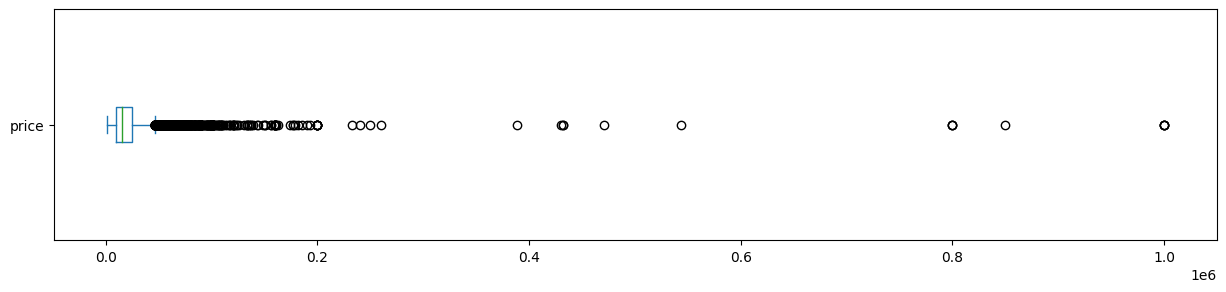

Existem 90 entradas acima de ¥100000.
Ou seja: 0.5449% das entradas.


In [ ]:
# Boxplot para price
df.price.plot(kind="box", vert=False, figsize=(15, 3));
plt.show()

# Verificando quantidade de valores acima de ¥100000
print("Existem {} entradas acima de ¥100000.".format( len(df[df.price > 100000]) ))
print("Ou seja: {:.4f}% das entradas.".format( len(df[df.price > 100000]) / df.shape[0] * 100 ))

#### Boxplot para a coluna minimum_nights

É plausível, em minha opinião, assumir que o mínimo de noites que um hóspede deve alugar seja até 30 dias (um mês). Períodos mínimos maiores que isso não parecem muito adequados pois tornariam a propriedade uma opção inviável para turistas que desejassem se hospedar por intervalos menores de tempo.

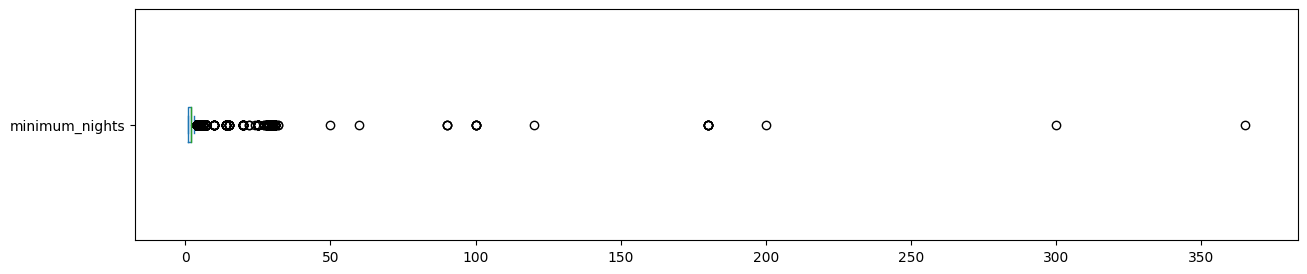

Existem 46 entradas acima de 30 dias.
Ou seja: 0.2785% das entradas.


In [ ]:
# Boxplot para minimum_nights
df.minimum_nights.plot(kind="box", vert=False, figsize=(15, 3));
plt.show()

# Verificando quantidade de valores acima de 30 dias
print("Existem {} entradas acima de 30 dias.".format( len(df[df.minimum_nights > 30]) ))
print("Ou seja: {:.4f}% das entradas.".format( len(df[df.minimum_nights > 30]) / df.shape[0] * 100 ))

**OBS: Para as colunas `number_of_reviews`, `reviews_per_month` e `number_of_reviews_ltm` considerei como *outliers* uma porção dos maiores valores que não excedesse 1% das entradas.**

#### Boxplot para a coluna number_of_reviews

> Adicionar aspas



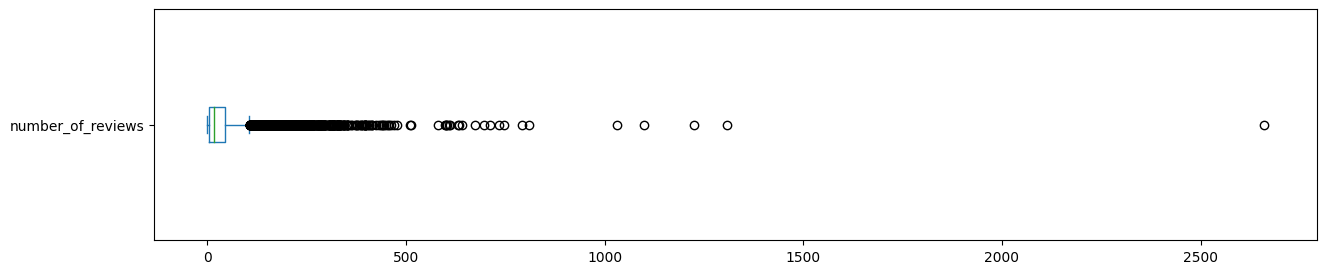

Existem 128 entradas acima de 300 avaliações totais.
Ou seja: 0.7749% das entradas.


In [ ]:
# Boxplot para number_of_reviews
df.number_of_reviews.plot(kind="box", vert=False, figsize=(15, 3));
plt.show()

# Verificando quantidade de valores acima de 300 avaliações totais
print("Existem {} entradas acima de 300 avaliações totais.".format( len(df[df.number_of_reviews > 300]) ))
print("Ou seja: {:.4f}% das entradas.".format( len(df[df.number_of_reviews > 300]) / df.shape[0] * 100 ))

#### Boxplot para a coluna reviews_per_month

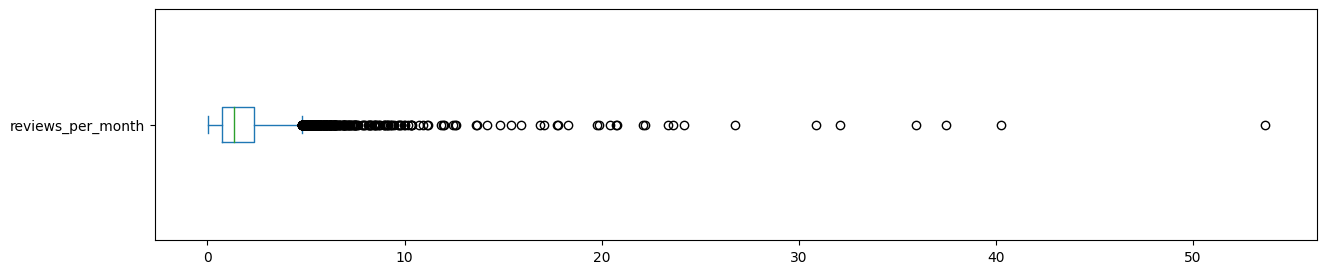

Existem 154 entradas acima de 6 avaliações por mês.
Ou seja: 0.9323% das entradas.


In [ ]:
# Boxplot para reviews_per_month
df.reviews_per_month.plot(kind="box", vert=False, figsize=(15, 3));
plt.show()

# Verificando quantidade de valores acima de 6 avaliações por mês
print("Existem {} entradas acima de 6 avaliações por mês.".format( len(df[df.reviews_per_month > 6]) ))
print("Ou seja: {:.4f}% das entradas.".format( len(df[df.reviews_per_month > 6]) / df.shape[0] * 100 ))

#### Boxplot para a coluna number_of_reviews_ltm

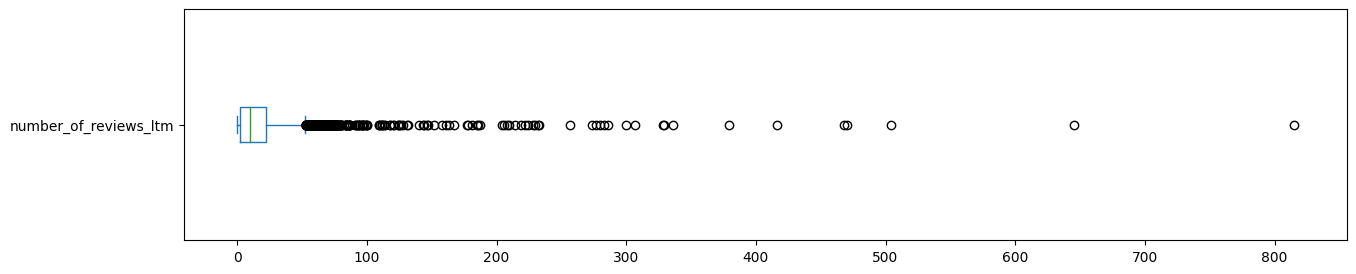

Existem 144 entradas acima de 72 avaliações nos últimos 12 meses.
Ou seja: 0.8718% das entradas.


In [ ]:
# Boxplot para number_of_reviews_ltm
df.number_of_reviews_ltm.plot(kind="box", vert=False, figsize=(15, 3));
plt.show()

# Verificando quantidade de valores acima de 72 avaliações nos últimos 12 meses
print("Existem {} entradas acima de 72 avaliações nos últimos 12 meses.".format( len(df[df.number_of_reviews_ltm > 72]) ))
print("Ou seja: {:.4f}% das entradas.".format( len(df[df.number_of_reviews_ltm > 72]) / df.shape[0] * 100 ))

#### Removendo os outliers

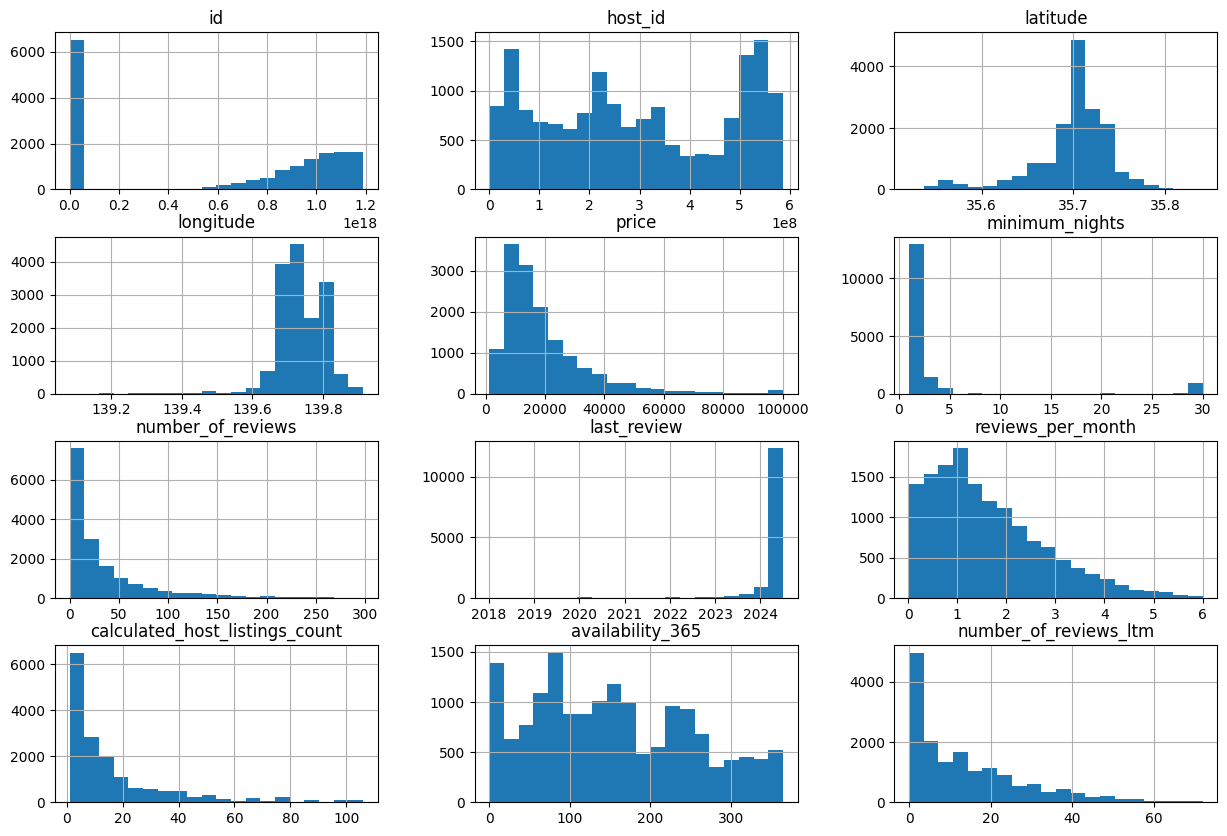

In [ ]:
# Criando uma cópia do DataFrame para realizar a remoção de outliers
df_clean = df.copy()

# Removendo a coluna vazia (neighbourhood_group)
df_clean.drop("neighbourhood_group", axis=1, inplace=True)

# Removendo os outliers
df_clean.drop(df_clean[df_clean.price > 100000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.number_of_reviews > 300].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.reviews_per_month > 6].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.number_of_reviews_ltm > 72].index, axis=0, inplace=True)

# Plotando os novos histogramas
df_clean.hist(bins=20, figsize=(15, 10));

### **Q4. Qual a média dos preços de aluguel?**

Após a remoção dos *outliers*, podemos chegar a um valor mais próximo da real média dos preços de aluguel:

In [ ]:
# Verificando a média da coluna price
print("Média dos preços de aluguel de imóveis em Tóquio: ¥{:.2f}".format(df_clean.price.mean()))

Média dos preços de aluguel de imóveis em Tóquio: ¥19366.84


### **Q4. Qual a correlação existente entre as variáveis**

In [ ]:
# Criando uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']].corr()

# Mostrando a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
price,1.000000,-0.001731,0.058676,0.127948,-0.159974,0.033350,0.052752
minimum_nights,-0.001731,1.000000,-0.163584,-0.174892,0.099025,0.090038,-0.229454
number_of_reviews,0.058676,-0.163584,1.000000,0.269292,-0.136533,-0.066193,0.664293
reviews_per_month,0.127948,-0.174892,0.269292,1.000000,-0.098638,0.027044,0.582961
calculated_host_listings_count,-0.159974,0.099025,-0.136533,-0.098638,1.000000,-0.036880,-0.096816
availability_365,0.033350,0.090038,-0.066193,0.027044,-0.036880,1.000000,-0.024174
number_of_reviews_ltm,0.052752,-0.229454,0.664293,0.582961,-0.096816,-0.024174,1.000000


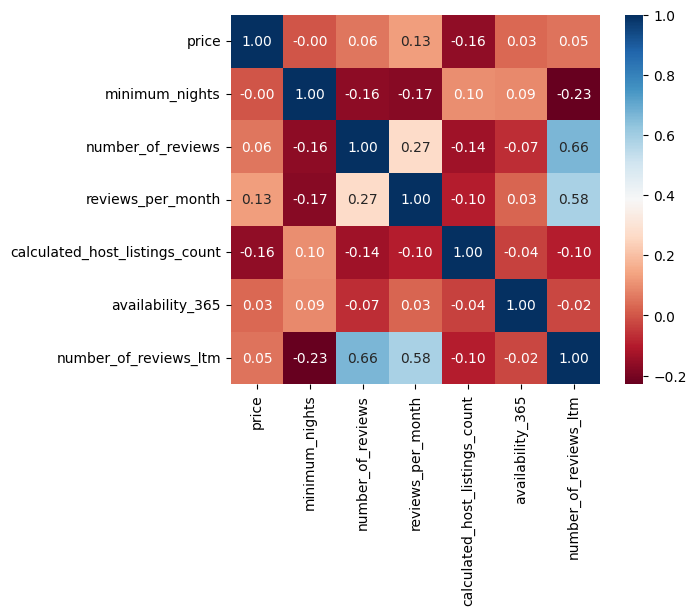

In [ ]:
# Plotando um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', annot=True, fmt='.2f', linecolor='white', square=True);

As variáveis que possuem mais relação entre si são:

* `number_of_reviews_ltm` e `number_of_reviews`
* `number_of_reviews_ltm` e `reviews_per_month`

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

Os anfitriões do Airbnb podem anunciar casas, apartamentos inteiros, quartos privados, compartilhados e, mais recentemente, quartos de hotel. Dentre essas opções, na cidade de Tóquio, os imóveis estão distribuídos da seguinte forma:

In [ ]:
# Mostrando a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

room_type
Entire home/apt    12705
Private room        2858
Shared room          401
Hotel room           142
Name: count, dtype: int64

In [ ]:
# Mostrando a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

room_type
Entire home/apt    0.788836
Private room       0.177449
Shared room        0.024898
Hotel room         0.008817
Name: count, dtype: float64

Os tipos de imóveis mais alugados são casas inteiras e apartamentos, representando 79% dos imóveis.

### **Q6. Qual a localidade mais cara do dataset?**

Para estimar qual a localidade mais cara para se alugar uma propriedade em Tóquio, podemos utilizar a função `groupby()` juntamente com `mean()` para obter a média de preços por localidade:

In [ ]:
# Verificando a média dos preços por bairros
df_clean.groupby(["neighbourhood"]).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Hinohara Mura    97857.000000
Shibuya Ku       24425.034372
Minato Ku        23989.217221
Meguro Ku        23285.602151
Chiyoda Ku       23062.169355
Taito Ku         22232.462287
Chuo Ku          21900.439815
Shinjuku Ku      21235.995063
Shinagawa Ku     20795.197740
Setagaya Ku      20392.031683
Name: price, dtype: float64

A primeira vista, o que parece é que [Hinohara Mura](https://en.wikipedia.org/wiki/Hinohara) é disparadamente a localidade mais cara em Tóquio, tendo uma média de preço de ¥73,432 a mais que [Shibuya](https://en.wikipedia.org/wiki/Shibuya), a segunda mais cara. Entretando, com uma rápida pesquisa sobre essas duas cidades percebe-se rapidamente que tal resultado não parece fazer sentido pois enquanto Hinohara é uma vila com população estimada de apenas 2101 habitantes, Shibuya é uma região especial da metrópole de Tóquio, sendo um dos maiores centros comerciais do mundo e abrigando as duas estações mais movimentadas do mundo: A Estação de Shinjuku e a Estação de Shibuya.

Para investigar melhor essa questão, podemos verificar os maiores preços de aluguel por localidade que possuímos no dataset após a remoção de possíveis outliers:

In [ ]:
# Verificando as 15 localidades com maior preço máximo de aluguel de uma propriedade
df_clean.groupby(["neighbourhood"]).price.max().sort_values(ascending=False)[:15]

neighbourhood
Toshima Ku       100000.0
Suginami Ku      100000.0
Minato Ku        100000.0
Koto Ku          100000.0
Katsushika Ku    100000.0
Setagaya Ku      100000.0
Meguro Ku        100000.0
Shinjuku Ku      100000.0
Shibuya Ku       100000.0
Taito Ku         100000.0
Sumida Ku        100000.0
Itabashi Ku       99999.0
Ome Shi           99000.0
Machida Shi       98000.0
Hinohara Mura     97857.0
Name: price, dtype: float64

Podemos observar que Hinohara Mura fica na décima quinta posição da lista, o que significa que ela não é a localidade que possui a propriedade cujo aluguel é o mais caro de Tóquio. Além disso, podemos notar que o preço de aluguel mais caro de Hinohara Mura é o mesmo valor que a média de preço nessa localidade, o que nos limita a duas hipóteses:

* Todos as propriedades localizadas em Hinohara presentes no dataset possuem o mesmo preço de aluguel: ¥97857.
* Existe apenas uma propriedade registrada nessa localidade sendo alugada por ¥97857.

Para verificar qual das hipóteses está correta e entender porque Hinohara Mura possui a maior média de preços, podemos analisar a quantidade de imóveis existentes no dataset nas 10 localidades com maior média:

In [ ]:
print("1 - Hinohara Mura:\t {} imóvel.".format(df_clean[df_clean.neighbourhood == 'Hinohara Mura'].shape[0]))
print("2 - Shibuya Ku:\t\t {} imóveis.".format(df_clean[df_clean.neighbourhood == 'Shibuya Ku'].shape[0]))
print("3 - Minato Ku:\t\t {} imóveis.".format(df_clean[df_clean.neighbourhood == 'Minato Ku'].shape[0]))
print("4 - Meguro Ku:\t\t {} imóveis.".format(df_clean[df_clean.neighbourhood == 'Meguro Ku'].shape[0]))
print("5 - Chiyoda Ku:\t\t {} imóveis.".format(df_clean[df_clean.neighbourhood == 'Chiyoda Ku'].shape[0]))
print("6 - Taito Ku:\t\t {} imóveis.".format(df_clean[df_clean.neighbourhood == 'Taito Ku'].shape[0]))
print("7 - Chuo Ku:\t\t {} imóveis.".format(df_clean[df_clean.neighbourhood == 'Chuo Ku'].shape[0]))
print("8 - Shinjuku Ku:\t {} imóveis.".format(df_clean[df_clean.neighbourhood == 'Shinjuku Ku'].shape[0]))
print("9 - Shinagawa Ku:\t {} imóveis.".format(df_clean[df_clean.neighbourhood == 'Shinagawa Ku'].shape[0]))
print("10 - Setagaya Ku:\t {} imóveis.".format(df_clean[df_clean.neighbourhood == 'Setagaya Ku'].shape[0]))

1 - Hinohara Mura:	 1 imóvel.
2 - Shibuya Ku:		 989 imóveis.
3 - Minato Ku:		 596 imóveis.
4 - Meguro Ku:		 106 imóveis.
5 - Chiyoda Ku:		 178 imóveis.
6 - Taito Ku:		 1895 imóveis.
7 - Chuo Ku:		 304 imóveis.
8 - Shinjuku Ku:	 3238 imóveis.
9 - Shinagawa Ku:	 220 imóveis.
10 - Setagaya Ku:	 528 imóveis.


Está aí o problema: A média de Hinohara Mura é a maior dentre as localidades de nosso dataset justamente porque ela é a que possui a menor quantidade possível de propriedades disponíveis para aluguel, o que distorce a média por ter uma amostragem muito pequena para a obtenção de resultados mais realistas, ao passo que outras localidades que são realmente mais caras que ela possuem centenas ou milhares de propriedades.

Podemos utilizar as colunas `latitude` e `longitude` para plotar um gráfico e visualizar melhor como estão distribuídas as propriedades no território de Tóquio:

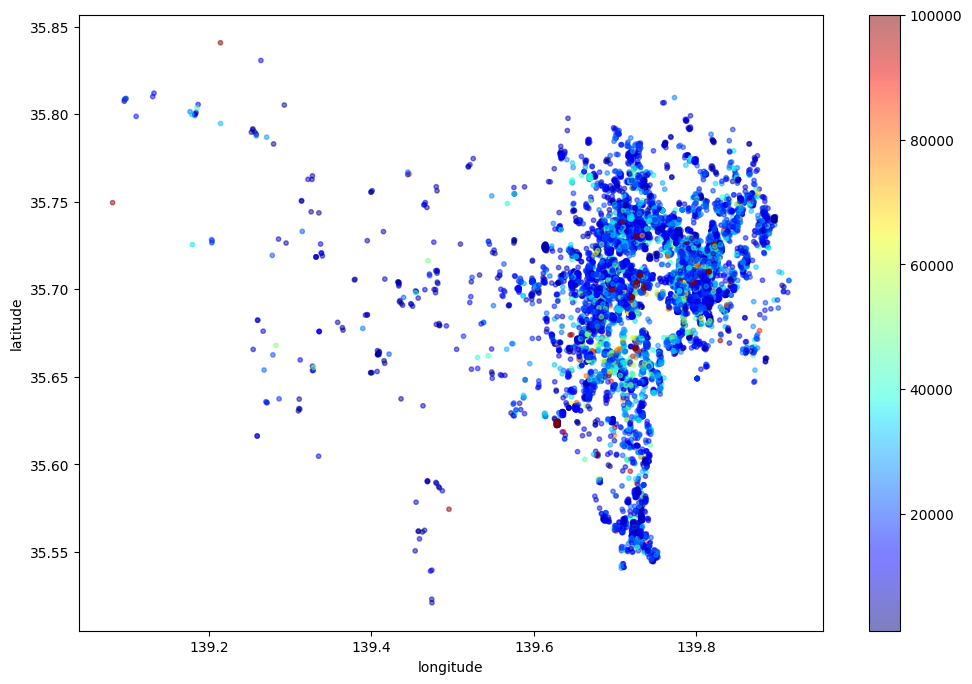

In [ ]:
# Plotando os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.5, c=df_clean['price'], s=10, cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# Verificando a média da coluna `minimum_nights``
print("Média do mínimo de noites para aluguel em Tóquio: {:.0f} noites.".format(df_clean.minimum_nights.mean()))

Média do mínimo de noites para aluguel em Tóquio: 3 noites.


## Conclusões


Após realizar uma análise exploratória superficial nos dados do Airbnb referentes à cidade de Tóquio, foram identificados valores ausentes e outliers que poderiam comprometer a análise estatística. Após a limpeza de possíveis outliers, foram obtidas as seguintes conclusões:

1. **Predominância de imóveis inteiros**: Cerca de 79% dos imóveis disponíveis para aluguel são casas inteiras ou apartamentos, indicando uma forte preferência por espaços que oferecem maior privacidade e comodidade.

2. **Múltiplos imóveis por anfitrião**: Aproximadamente 90% dos anfitriões possuem mais de um imóvel listado. Isso sugere que a maioria dos anfitriões são provavelmente proprietários experientes com suas operações devidamente regulamentadas, o que aumenta a confiança dos hóspedes de que os imóveis são profissionais e não residenciais.

3. **Período mínimo de estadia**: A média do período mínimo de noites para aluguel é de 3 dias. Esse período mais curto é adequado para atender às necessidades dos turistas que visitam a cidade por períodos limitados.

4. **Média de preços de aluguel**: O preço médio de aluguel dos imóveis é de ¥19.366,84, com algumas propriedades sendo alugadas por valores superiores a ¥100.000. Isso reflete uma ampla variação nos preços, possivelmente devido à localização, tamanho e conforto oferecido.

5. **Localidade mais cara**: Shibuya Ku é a localidade mais cara, com uma média de preços de aluguel em ¥24.425. Esta área é conhecida por ser um forte centro comercial e cultural, o que justifica os valores mais elevados.

Esses insights fornecem uma visão inicial sobre as tendências e características do mercado de aluguel em Tóquio através do Airbnb, o que mostra aspectos interessantes para análises mais detalhadas e potenciais ajustes nas estratégias de oferta e demanda.